In [29]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets,linear_model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

In [41]:
df = pd.read_csv('house_prices.csv') 
min_list =[]
max_list=[]
for i in range(1,len(df.columns)-1):
    min_list.append(min(df[df.columns[i]]))
    max_list.append(max(df[df.columns[i]]))
    df[df.columns[i]] = (df[df.columns[i]]-min_list[i-1])/(max_list[i-1]-min_list[i-1])
print(df.head())

   No  house age  distance to the nearest MRT station  \
0   1   0.150685                             0.010375   
1   2   0.468037                             0.334395   
2   3   0.684932                             0.153134   
3   4   0.294521                             0.035152   
4   5   0.671233                             0.694080   

   number of convenience stores  house price of unit area  
0                           0.9                      58.1  
1                           0.3                      25.6  
2                           0.5                      22.8  
3                           0.7                      39.3  
4                           0.1                      13.2  


In [31]:
# Data Split
data_x = df.iloc[:,:-1]
data_y = df.iloc[:,-1]
train_x,test_x,train_y,test_y = train_test_split(data_x,data_y,test_size=0.25,shuffle=False)
# 100 rows for testing

In [32]:
def h(x,theta_0,theta_1):
    return (theta_0+theta_1*x)

# function of Stochastic Gradient Descent
def sgd(train_x,train_y,theta_0=-1,theta_1=-0.5,alpha=0.01):
    J_values = []
    for j in range(50):
        J_value = 0
        for i in range(train_x.shape[0]):
            theta_0 = theta_0 + alpha*(train_y[i]-h(train_x[i],theta_0,theta_1))
            theta_1 = theta_1 + alpha*(train_y[i]-h(train_x[i],theta_0,theta_1))*train_x[i]
            J_value += (train_y[i]-h(age_train[i],theta_0,theta_1))**2
        J_values.append(J_value/train_x.shape[0])
    return theta_0,theta_1,J_values

In [34]:
age_train = train_x[train_x.columns[1]]
theta_0,theta_1,J_values_age = sgd(age_train,train_y)
print(theta_0,theta_1)

42.54098352098717 -10.321581018919572


In [37]:
RMSE_train =0
RMSE_test = 0
age_test = test_x[test_x.columns[1]]
for i in range(train_y.shape[0]):
    RMSE_train += (train_y[i]-h(age_train[i],theta_0,theta_1))**2
for i in range(train_y.shape[0],data_y.shape[0]):
    RMSE_test += (test_y[i]-h(age_test[i],theta_0,theta_1))**2
RMSE_train = np.sqrt(RMSE_train/train_y.shape[0])
RMSE_test = np.sqrt(RMSE_test/(data_y.shape[0]-train_y.shape[0]))
print('RMSE for age training set is {0:3}, RMSE for age test set is {1:3},\
and the absolute difference is {2:3}'.format(RMSE_train,RMSE_test,abs(RMSE_test-RMSE_train)))

RMSE for age training set is 12.045471635151399, RMSE for age test set is 16.587314577458564,and the absolute difference is 4.541842942307165


## Distance

In [38]:
dist_train = train_x[train_x.columns[2]]
theta_0,theta_1,J_values_dist = sgd(dist_train,train_y)
RMSE_train =0
RMSE_test = 0
dist_test = test_x[test_x.columns[2]]
for i in range(train_y.shape[0]):
    RMSE_train += (train_y[i]-h(dist_train[i],theta_0,theta_1))**2
for i in range(train_y.shape[0],data_y.shape[0]):
    RMSE_test += (test_y[i]-h(dist_test[i],theta_0,theta_1))**2
RMSE_train = np.sqrt(RMSE_train/train_y.shape[0])
RMSE_test = np.sqrt(RMSE_test/(data_y.shape[0]-train_y.shape[0]))
print('RMSE for distance to station feature training set is {0:3}, \
RMSE for age test set is {1:3},and the absolute difference is {2:3}'.\
      format(RMSE_train,RMSE_test,abs(RMSE_test-RMSE_train)))
    


RMSE for distance to station feature training set is 9.165812661768193, RMSE for age test set is 12.65187816696171,and the absolute difference is 3.486065505193517


## Convenience Stores

In [40]:
store_train = train_x[train_x.columns[3]]
theta_0,theta_1,J_values_store = sgd(store_train,train_y)
RMSE_train =0
RMSE_test = 0
store_test = test_x[test_x.columns[3]]
for i in range(train_y.shape[0]):
    RMSE_train += (train_y[i]-h(store_train[i],theta_0,theta_1))**2
for i in range(train_y.shape[0],data_y.shape[0]):
    RMSE_test += (test_y[i]-h(store_test[i],theta_0,theta_1))**2
RMSE_train = np.sqrt(RMSE_train/train_y.shape[0])
RMSE_test = np.sqrt(RMSE_test/(data_y.shape[0]-train_y.shape[0]))
print('RMSE for distance to station feature training set is {0:3}, \
RMSE for age test set is {1:3},and the absolute difference is {2:3}'.\
      format(RMSE_train,RMSE_test,abs(RMSE_test-RMSE_train)))

RMSE for distance to station feature training set is 9.834850879113743, RMSE for age test set is 14.732079954030375,and the absolute difference is 4.897229074916632


## Plot

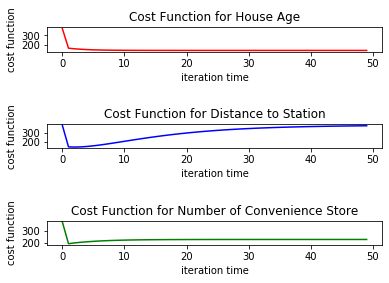

In [46]:
x_axis=np.arange(len(J_values_age))
plt.subplots_adjust(hspace=3)

plt.subplot(3,1,1)
plt.plot(x_axis,J_values_age,color='red')
plt.xlabel('iteration time')
plt.ylabel('cost function')
plt.title('Cost Function for House Age')

plt.subplot(3,1,2)
plt.plot(x_axis,J_values_dist,color='blue')
plt.xlabel('iteration time')
plt.ylabel('cost function')
plt.title('Cost Function for Distance to Station')

plt.subplot(3,1,3)
plt.plot(x_axis,J_values_store,color='green')
plt.xlabel('iteration time')
plt.ylabel('cost function')
plt.title('Cost Function for Number of Convenience Store')

plt.show()